In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
diabets_classes = pd.read_csv('../../DATA/diabets_classes.csv', index_col=False)
diabets_x = diabets_classes.drop(['diabets'], axis=1)
diabets = diabets_classes['diabets']
pre_diabets_classes = pd.read_csv('../../DATA/pre_diabets_classes.csv', index_col=False)
pre_diabets_x = pre_diabets_classes.drop(['pre_diabets'], axis=1)
pre_diabets = pre_diabets_classes['pre_diabets']
non_diabets_classes = pd.read_csv('../../DATA/non_diabets_classes.csv', index_col=False)
non_diabets_x = non_diabets_classes.drop(['non_diabets'], axis=1)
non_diabets = non_diabets_classes['non_diabets']


In [3]:
x_diabets_train, x_diabets_test, y_diabets_train, y_diabets_test = train_test_split(diabets_x, diabets, test_size=0.25)
x_pre_diabets_train, x_pre_diabets_test, y_pre_diabets_train, y_pre_diabets_test = train_test_split(pre_diabets_x, pre_diabets, test_size=0.25)
x_non_diabets_train, x_non_diabets_test, y_non_diabets_train, y_non_diabets_test = train_test_split(non_diabets_x, non_diabets, test_size=0.25)

In [4]:
def show_regression_params(lr, c):
    print(abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.bar(c, abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.xticks(rotation=90)
    plt.axhline(abs(lr.best_estimator_.coef_).mean(axis=0).mean(), color='red')
    plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


# Diabets KNN

In [5]:
diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                        {'C': [1e-5, 1e-4, 1e-3,
                                               1e-2, 1e-1, 1, 10, 100]},
                                        n_jobs=4,
                                        scoring='accuracy'
                                        ).fit(x_diabets_train, y_diabets_train)

# 6 min


In [6]:
diabets_predict = diabets_classifier.predict(x_diabets_test)
# 1 min


[0.24974992 0.47911372 0.91864318 3.81513948 0.16153931 0.16347711
 0.10919088 0.02060373 0.348567   0.88562212 0.14634633 0.05782391
 0.10284917 0.01145751 1.53172552 0.20735891 0.41838136]


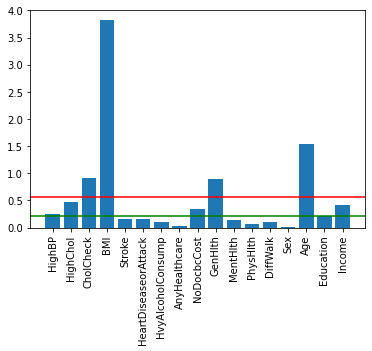

In [7]:
show_regression_params(diabets_classifier, x_diabets_train.columns)


In [8]:
print(classification_report(diabets_predict, y_diabets_test))


              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61      1088
         1.0       0.66      0.64      0.65      1228

    accuracy                           0.63      2316
   macro avg       0.63      0.63      0.63      2316
weighted avg       0.63      0.63      0.63      2316



# Prediabets KNN

In [9]:
pre_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


In [10]:
GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


GridSearchCV(estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [11]:
pre_diabets_predict = diabets_classifier.predict(x_pre_diabets_test)
# 1 min


[0.73776839 0.5677913  1.28460618 6.24092524 0.11162421 0.21696547
 0.76478618 0.1346879  0.04979125 2.3395825  0.14636627 0.23651682
 0.13858472 0.28938748 1.71923377 0.23831444 0.38692406]


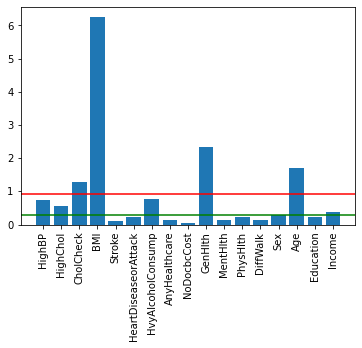

In [12]:
show_regression_params(pre_diabets_classifier, x_pre_diabets_train.columns)


In [13]:
print(classification_report(pre_diabets_predict, y_pre_diabets_test))


              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      8062
         1.0       0.78      0.72      0.75      9611

    accuracy                           0.73     17673
   macro avg       0.73      0.74      0.73     17673
weighted avg       0.74      0.73      0.73     17673



# Nondiabets KNN

In [14]:
non_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                      {'C': [1e-5, 1e-4, 1e-3,
                                             1e-2, 1e-1, 1, 10, 100]},
                                      n_jobs=4,
                                      scoring='accuracy'
                                      ).fit(x_non_diabets_train, y_non_diabets_train)


[0.71604018 0.60361488 1.15974643 5.44248834 0.10935317 0.18162507
 0.68853507 0.0618275  0.0837381  2.06458838 0.05090079 0.20180974
 0.11745783 0.24316297 1.51674268 0.1920635  0.40367322]


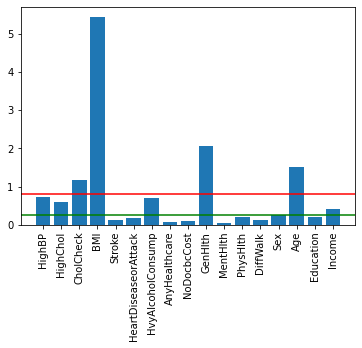

In [15]:
show_regression_params(non_diabets_classifier, x_non_diabets_train.columns)


In [16]:
non_diabets_predict = diabets_classifier.predict(x_non_diabets_test)
# 1 min


In [17]:
print(classification_report(non_diabets_predict, y_non_diabets_test))


              precision    recall  f1-score   support

         0.0       0.24      0.06      0.10     39598
         1.0       0.30      0.68      0.42     23822

    accuracy                           0.30     63420
   macro avg       0.27      0.37      0.26     63420
weighted avg       0.27      0.30      0.22     63420

